# Part 3

# Dogs vs Cats

##### The Dogs vs. Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat.

In [96]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

### Function classified as dog or cat

In [97]:
def label_img(img):
    word_label = img.split('.')[-3]
    
    if word_label == 'cat': 
        return 0
    
    elif word_label == 'dog': 
        return 1

### Creat Data Frame

In [98]:
from sklearn.model_selection import train_test_split as split

In [99]:
def creat_train_data(data_train):
    training_data=[]
    
    for img in tqdm(os.listdir(data_train)):
        label = label_img(img)
        path = os.path.join(data_train, img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (50, 50))
        training_data.append([np.array(img), np.array(label)])
        
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    
    return training_data

### Prepare data and basic info:

In [100]:
data_train = r'C:/Users/moria/Desktop/Data/Part 3/train'
data_test = r'C:/Users/moria/Desktop/Data/Part 3/test1'
data_train = creat_train_data(data_train)

100%|██████████| 25000/25000 [00:27<00:00, 917.87it/s]


#### Our features:
* long_hair
* forehead_width_cm 
* forehead_height_cm 
* nose_wide e".
* nose_long 
* lips_thin
* distance_nose_to_lip_long gende

In [101]:
X = np.array([i[0] for i in data_train]).reshape(25000,2500)
Y = [i[1] for i in data_train]

In [102]:
images_fifty = pd.DataFrame(X)

In [103]:
def image_plot(images_set, Y_labels, image_number1, image_number2, size=50):
    f, ax = plt.subplots(1, 2, figsize=(10, 10))
    images = images_set.values
    images = images.reshape(-1, size, size)
    img1 = images[image_number1]
    img2 = images[image_number2]
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray')
    plt.show()

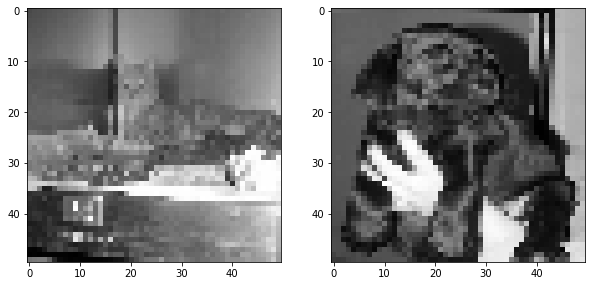

In [105]:
 image_plot(images_fifty, Y, 1000, 2)

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Models

In [107]:
def fit_predict(name, modle, PCA=False):
    if (PCA==True):
        modle.fit(x_train, y_train)
        print(name, "Accuracy with PCA: {:.2f}%".format(modle.score(x_test, y_test)*100), "\n")

        y_pred = modle.predict(x_test)
        print(name, "Matrix with PCA:\n", confusion_matrix(y_test, y_pred), "\n")
        print("Classification Report:\n", classification_report(y_test, y_pred))
    
    else:
        modle.fit(x_train, y_train)
        print(name, "Accuracy: {:.2f}%".format(modle.score(x_test, y_test)*100), "\n")

        y_pred = modle.predict(x_test)
        print(name, "Matrix:\n", confusion_matrix(y_test, y_pred), "\n")
        print("Classification Report:\n", classification_report(y_test, y_pred))

## LogisticRegression

In [108]:
logisticRegression = LogisticRegression()
fit_predict("LogisticRegression", logisticRegression)

LogisticRegression Accuracy: 54.00% 

LogisticRegression Matrix:
 [[1381 1157]
 [1143 1319]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.54      0.55      2538
           1       0.53      0.54      0.53      2462

    accuracy                           0.54      5000
   macro avg       0.54      0.54      0.54      5000
weighted avg       0.54      0.54      0.54      5000



## KNN

In [109]:
KNN = KNeighborsClassifier()
fit_predict("KNN", KNN)

KNN Accuracy: 56.22% 

KNN Matrix:
 [[1841  697]
 [1492  970]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.73      0.63      2538
           1       0.58      0.39      0.47      2462

    accuracy                           0.56      5000
   macro avg       0.57      0.56      0.55      5000
weighted avg       0.57      0.56      0.55      5000



## DecisionTree

In [110]:
decisionTree = DecisionTreeClassifier()
fit_predict("DecisionTree", decisionTree)

DecisionTree Accuracy: 55.84% 

DecisionTree Matrix:
 [[1340 1198]
 [1010 1452]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.53      0.55      2538
           1       0.55      0.59      0.57      2462

    accuracy                           0.56      5000
   macro avg       0.56      0.56      0.56      5000
weighted avg       0.56      0.56      0.56      5000



## RandomForest

In [111]:
randomForest = RandomForestClassifier()
fit_predict("RandomForest", randomForest)

RandomForest Accuracy: 64.56% 

RandomForest Matrix:
 [[1679  859]
 [ 913 1549]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.66      0.65      2538
           1       0.64      0.63      0.64      2462

    accuracy                           0.65      5000
   macro avg       0.65      0.65      0.65      5000
weighted avg       0.65      0.65      0.65      5000



## XGboost

In [112]:
XG = XGBClassifier(n_estimators= 25, n_jobs=-1, learning_rate=0.4, seed=0)
fit_predict("XGboost", XG)

[22:15:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGboost Accuracy: 63.12% 

XGboost Matrix:
 [[1570  968]
 [ 876 1586]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63      2538
           1       0.62      0.64      0.63      2462

    accuracy                           0.63      5000
   macro avg       0.63      0.63      0.63      5000
weighted avg       0.63      0.63      0.63      5000



# Dimension Reduction by using PCA

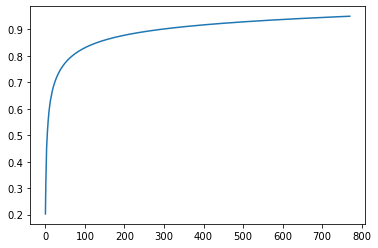

In [113]:
pca = PCA(n_components=0.95)
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [114]:
x_trin_new = pca.fit_transform(x_train)
x_test_new = pca.transform(x_test)

In [115]:
print("Size befor PCA" + str(x_train.shape))
print("Size after PCA" + str(x_trin_new.shape))

Size befor PCA(20000, 2500)
Size after PCA(20000, 771)


## Random Forest

In [117]:
randomForest_pca = RandomForestClassifier()
fit_predict("RandomForest", randomForest_pca, True)

RandomForest Accuracy with PCA: 64.00% 

RandomForest Matrix with PCA:
 [[1640  898]
 [ 902 1560]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.65      0.65      2538
           1       0.63      0.63      0.63      2462

    accuracy                           0.64      5000
   macro avg       0.64      0.64      0.64      5000
weighted avg       0.64      0.64      0.64      5000



## XGboost

In [119]:
XG_pca = XGBClassifier(n_estimators= 25, n_jobs=-1, learning_rate=0.4, seed=0, eval_metric = 'mlogloss')
fit_predict("XGboost", XG_pca, True)

XGboost Accuracy with PCA: 63.12% 

XGboost Matrix with PCA:
 [[1570  968]
 [ 876 1586]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63      2538
           1       0.62      0.64      0.63      2462

    accuracy                           0.63      5000
   macro avg       0.63      0.63      0.63      5000
weighted avg       0.63      0.63      0.63      5000



# Result

| Model  | Accuracy | Accuracy with PCA |
| ------------- | ------------- | ------------- |
| LogisticRegression  |  54.00%  | |
| KNN  | 56.22%  | |
| DecisionTree  | 55.84%  | |
| RandomForest  | 64.56%  | 64.00% |
| XGboost  | 63.12%  | 63.12% |

### Classified as:

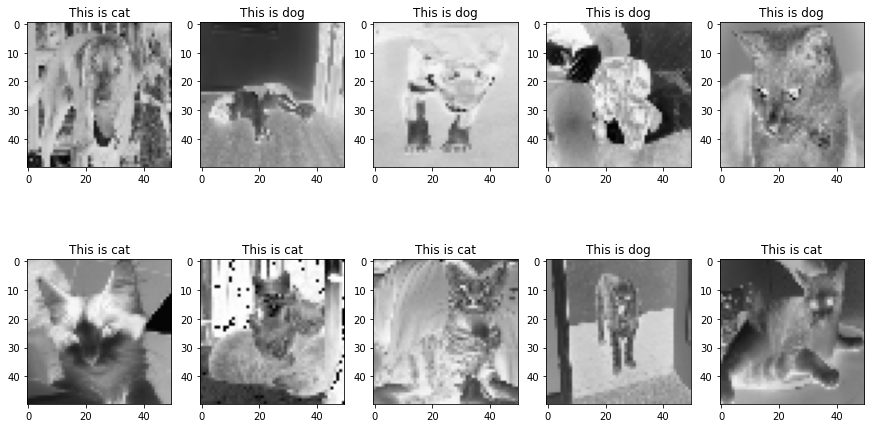

In [123]:
classes = {0: 'cat', 1: 'dog'}

f, ax = plt.subplots(2,5 , figsize = (15,8))

for i,j in enumerate(np.random.randint(0, len(x_test), 10)) :
    image = x_test[j:j+1]
    image_class = classes[XG.predict(image)[0]]
    image = (np.array(image).reshape(50, 50)*255).astype(np.uint8)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax[i//5, i%5].imshow(image)
    ax[i//5, i%5].set_title("Classified as {}".format(image_class))
    
plt.show()

### Confusion matrix

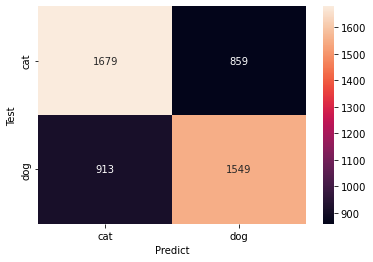

In [126]:
y_pred = randomForest.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
index = ['cat', 'dog']
columns = ['cat', 'dog']
cm_pd = pd.DataFrame(data=cm, index=index, columns=columns)
sns.heatmap(cm_pd, fmt=".0f", annot=True)
plt.xlabel("Predict")
plt.ylabel("Test")

plt.show()